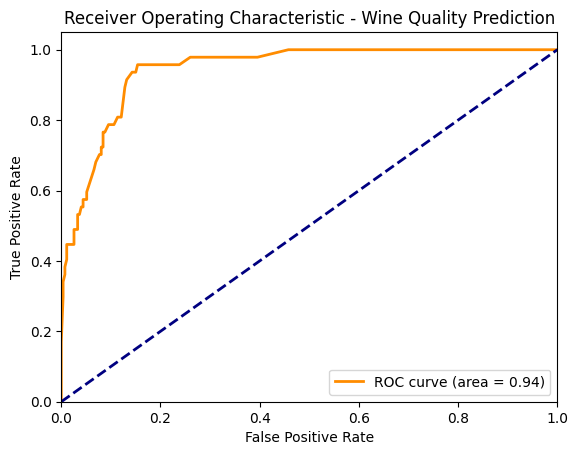

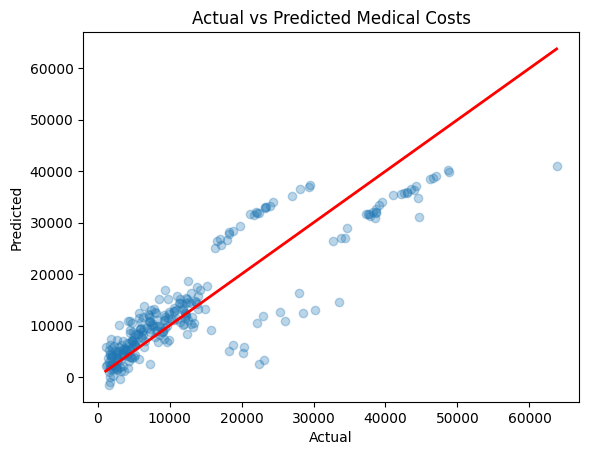

('              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94       273\n           1       0.73      0.51      0.60        47\n\n    accuracy                           0.90       320\n   macro avg       0.82      0.74      0.77       320\nweighted avg       0.89      0.90      0.89       320\n',
 0.9431065388512196,
 4181.194473753654,
 33596915.85136149,
 5796.284659276275,
 0.7835929767120722)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
wine_df = pd.read_excel(r'C:\Users\shant\Downloads\zip_session_92f6962ea67fa6d5f5d14ca58fa68bec_54b4fffcc46ed7d216d1ed5cc9d96424\winequality-red.xlsx')
medical_df = pd.read_excel(r'C:\Users\shant\Downloads\zip_session_92f6962ea67fa6d5f5d14ca58fa68bec_54b4fffcc46ed7d216d1ed5cc9d96424\medical_cost_insurance.xlsx')

# Task 1: Red Wine Quality Prediction
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)
X_wine = wine_df.drop('quality', axis=1)
y_wine = wine_df['quality']
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_wine, y_train_wine)
y_pred_wine = rf.predict(X_test_wine)
y_pred_prob_wine = rf.predict_proba(X_test_wine)[:, 1]
wine_classification_report = classification_report(y_test_wine, y_pred_wine)
fpr_wine, tpr_wine, _ = roc_curve(y_test_wine, y_pred_prob_wine)
roc_auc_wine = auc(fpr_wine, tpr_wine)
plt.figure()
plt.plot(fpr_wine, tpr_wine, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_wine)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Wine Quality Prediction')
plt.legend(loc="lower right")
plt.show()

# Task 2: Medical Cost Prediction
medical_df = pd.get_dummies(medical_df, drop_first=True)
X_medical = medical_df.drop('charges', axis=1)
y_medical = medical_df['charges']
X_train_medical, X_test_medical, y_train_medical, y_test_medical = train_test_split(X_medical, y_medical, test_size=0.2, random_state=42)
X_train_medical = scaler.fit_transform(X_train_medical)
X_test_medical = scaler.transform(X_test_medical)
lr = LinearRegression()
lr.fit(X_train_medical, y_train_medical)
y_pred_medical = lr.predict(X_test_medical)
mae_medical = mean_absolute_error(y_test_medical, y_pred_medical)
mse_medical = mean_squared_error(y_test_medical, y_pred_medical)
rmse_medical = mse_medical ** 0.5
r2_medical = r2_score(y_test_medical, y_pred_medical)
plt.figure()
plt.scatter(y_test_medical, y_pred_medical, alpha=0.3)
plt.plot([y_test_medical.min(), y_test_medical.max()], [y_test_medical.min(), y_test_medical.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Medical Costs')
plt.show()

(wine_classification_report, roc_auc_wine, mae_medical, mse_medical, rmse_medical, r2_medical)
